In [15]:
import os
import cv2
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import os

In [57]:
dict = {0: 'downdog', 1: 'goddess', 2: 'plank', 3: 'tree', 4: 'warrior2'}

In [2]:
def load_images_from_folder(folder):
    images = []
    count = 0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            count += 1
        else:
            print(f"Error reading image: {os.path.join(folder, filename)}")
    return images

In [5]:
def convert_dataset_to_2D_array(train_dir):
    overall_images = []
    k = os.listdir(train_dir)
    k.sort()

    for i, col in enumerate(k):
        original_path = os.path.join(train_dir, col)
        images = load_images_from_folder(original_path)
        overall_images.append(images)

        # Print information about the current directory
        print(f"Read {len(images)} images from directory: {original_path}")

    return overall_images

In [6]:

# Replace 'your_train_dir_path' with the actual path to your training directory
train_dir = 'F:\Anaconda_Project\yoga_assistant-master_Version02\DATASET\TRAIN'
new = convert_dataset_to_2D_array(train_dir)

Read 223 images from directory: F:\Anaconda_Project\yoga_assistant-master_Version02\DATASET\TRAIN\downdog
Read 180 images from directory: F:\Anaconda_Project\yoga_assistant-master_Version02\DATASET\TRAIN\goddess
Read 266 images from directory: F:\Anaconda_Project\yoga_assistant-master_Version02\DATASET\TRAIN\plank
Read 160 images from directory: F:\Anaconda_Project\yoga_assistant-master_Version02\DATASET\TRAIN\tree
Read 252 images from directory: F:\Anaconda_Project\yoga_assistant-master_Version02\DATASET\TRAIN\warrior2


In [9]:

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_2D_array(overall_images):
    new_arr_for_outerdirectory = []
    for i in range(len(overall_images)):
      col = overall_images[i]
      new_array_for_subdirectory = []
      for j in range(len(overall_images[i])):


        img = overall_images[i][j]
        h, w = img.shape[:2]

        if h < w:
          img = cv2.resize(img, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
          print(img.shape)
          # os.chdir(output_dir)
          # newpath = os.path.join(output_dir, col)
          # cv2.imwrite(os.path.join(newpath, str(j)+'.jpg'), img)

        else:
          img = cv2.resize(img, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
          print(img.shape)
          # os.chdir(output_dir)
          # newpath = os.path.join(output_dir, col)
          # cv2.imwrite(os.path.join(newpath, str(j)+'.jpg'), img)

        #appending the image to a new array
        new_array_for_subdirectory.append(img)
      new_arr_for_outerdirectory.append(new_array_for_subdirectory)

    return new_arr_for_outerdirectory


In [10]:
newarray = resize_2D_array(new)

(318, 480, 3)
(319, 480, 3)
(340, 480, 3)
(326, 480, 3)
(226, 480, 3)
(270, 480, 3)
(317, 480, 3)
(480, 480, 3)
(315, 480, 3)
(320, 480, 3)
(339, 480, 3)
(320, 480, 3)
(480, 480, 3)
(270, 480, 3)
(320, 480, 3)
(323, 480, 3)
(322, 480, 3)
(320, 480, 3)
(353, 480, 3)
(359, 480, 3)
(360, 480, 3)
(295, 480, 3)
(284, 480, 3)
(270, 480, 3)
(480, 480, 3)
(323, 480, 3)
(360, 480, 3)
(284, 480, 3)
(322, 480, 3)
(359, 480, 3)
(295, 480, 3)
(270, 480, 3)
(480, 480, 3)
(353, 480, 3)
(320, 480, 3)
(230, 480, 3)
(353, 480, 3)
(251, 480, 3)
(360, 480, 3)
(336, 480, 3)
(376, 480, 3)
(357, 480, 3)
(284, 480, 3)
(360, 480, 3)
(349, 480, 3)
(360, 480, 3)
(383, 480, 3)
(180, 480, 3)
(320, 480, 3)
(480, 480, 3)
(270, 480, 3)
(312, 480, 3)
(378, 480, 3)
(270, 480, 3)
(360, 480, 3)
(320, 480, 3)
(284, 480, 3)
(180, 480, 3)
(480, 480, 3)
(297, 480, 3)
(270, 480, 3)
(385, 480, 3)
(305, 480, 3)
(480, 371, 3)
(270, 480, 3)
(238, 480, 3)
(299, 480, 3)
(270, 480, 3)
(270, 480, 3)
(480, 463, 3)
(270, 480, 3)
(423, 

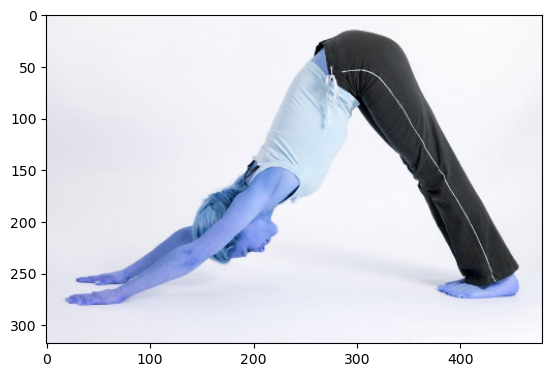

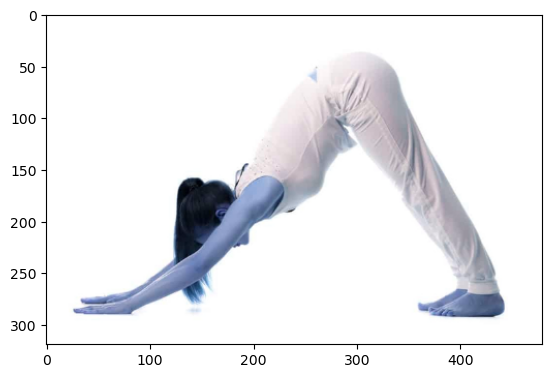

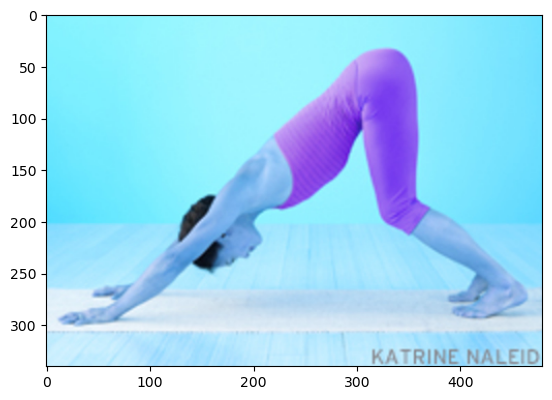

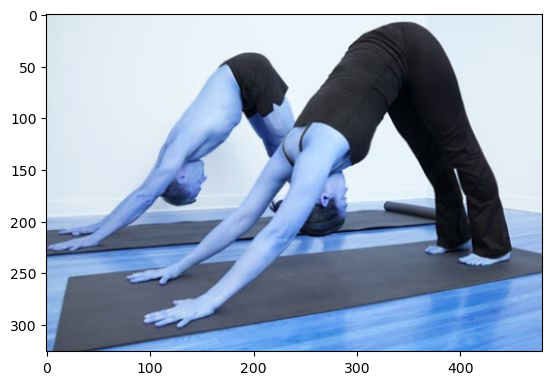

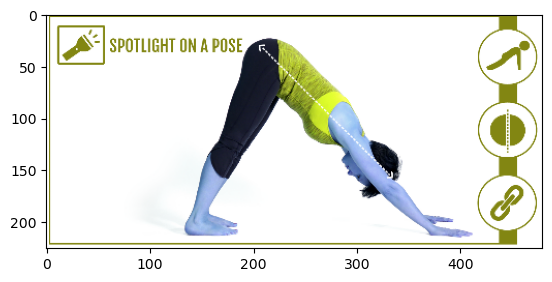

In [17]:
def print_some_images(overall_images, num_images_to_show=5):
    k = 0

    for i in range(len(overall_images)):
        for j in range(len(overall_images[i])):
            plt.imshow(overall_images[i][j])
            plt.show()
            k += 1

            if k == num_images_to_show:
                break

        if k == num_images_to_show:
            break

# Chỉ hiển thị 5 ảnh rồi dừng
print_some_images(newarray, num_images_to_show=5)


Cải thiện độ sáng của các hình ảnh 

In [20]:
#for brightness improvement

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

def isbright(image, dim=10):
    # Resize image to 10x10
    image = cv2.resize(image, (dim, dim))
    # Convert color space to LAB format and extract L channel
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    max_L = np.max(L)
    # Check if max_L is non-zero to avoid division by zero
    if max_L != 0:
        # Normalize L channel by dividing all pixel values with maximum pixel value
        L = L / max_L

    # Return True if mean is greater than thresh else False
    return np.mean(L)

def changeBrightness(image):

  if (isbright(image) < 0.5):
    gammaImg = gammaCorrection(image, 1)
  elif (isbright(image) > 0.85):
    gammaImg = gammaCorrection(image, 0.75)
  else:
    gammaImg = image
  return gammaImg


def improve_brightness(overall_images):
    new_arr = []
    for i in range(len(overall_images)):
      col = overall_images[i]
      new_array_1 = []
      for j in range(len(overall_images[i])):

        img = changeBrightness(overall_images[i][j])
        #appending the image to a new array
        new_array_1.append(img)
      new_arr.append(new_array_1)
    return new_arr

newarray = improve_brightness(newarray)

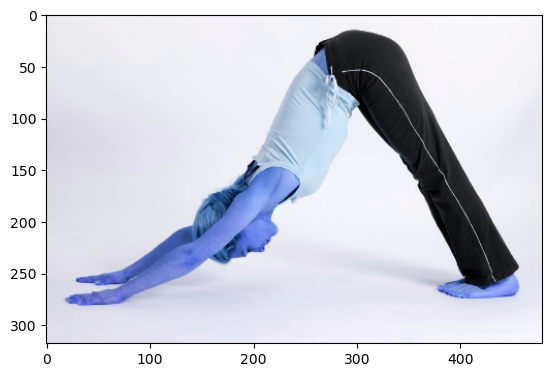

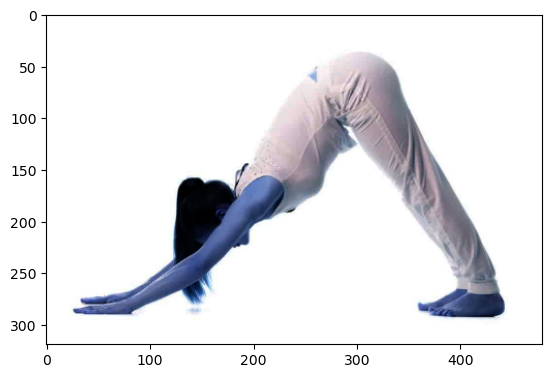

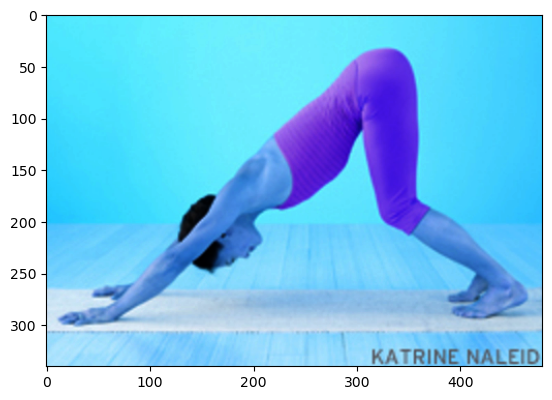

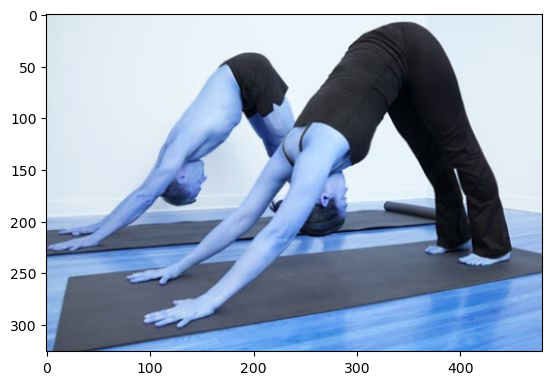

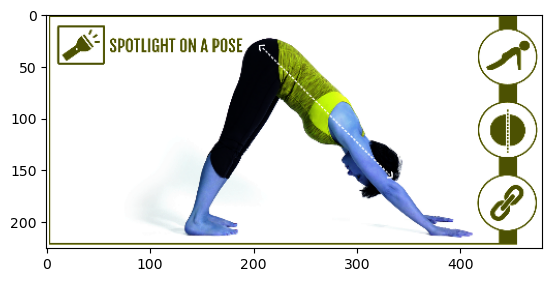

In [21]:
print_some_images(newarray)

In [24]:
import numpy as np
from skimage.exposure import is_low_contrast

In [22]:
def histogram_equalization(img_in):
# segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf
    cdf_b = np.cumsum(h_b)
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)

# mask all pixels with value=0 and replace it with mean of the pixel values
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')

    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')

# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]

    img_out = cv2.merge((img_b, img_g, img_r))
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

In [25]:
def improve_contrast(overall_images):
    new_arr = []
    for i in range(len(overall_images)):
      col = overall_images[i]
      new_array_1 = []
      for j in range(len(overall_images[i])):

        img = overall_images[i][j]
        if(is_low_contrast(img, fraction_threshold=0.05, lower_percentile=1, upper_percentile=99, method='linear')):
          img = histogram_equalization(img)

        #appending the image to a new array
        new_array_1.append(img)
      new_arr.append(new_array_1)
    return new_arr


newarray = improve_contrast(newarray)

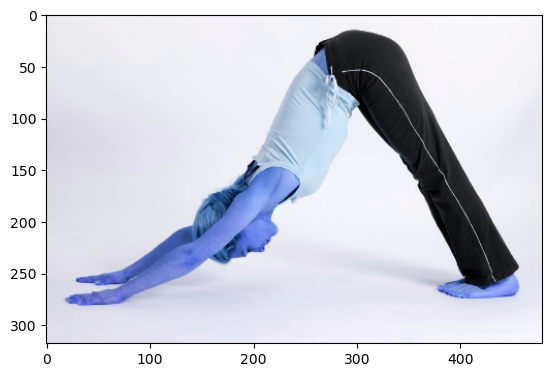

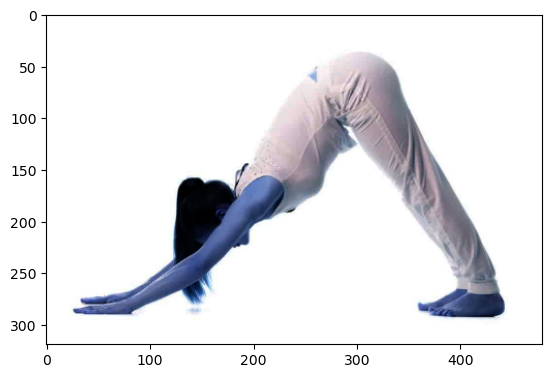

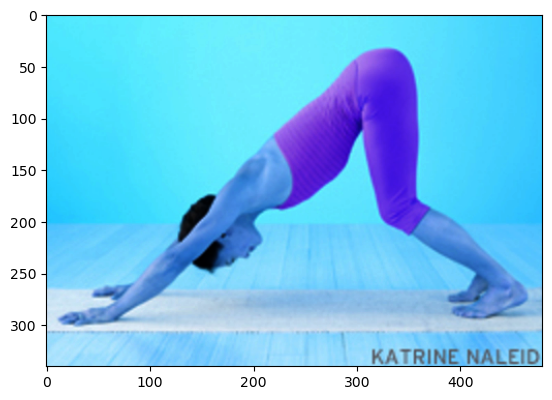

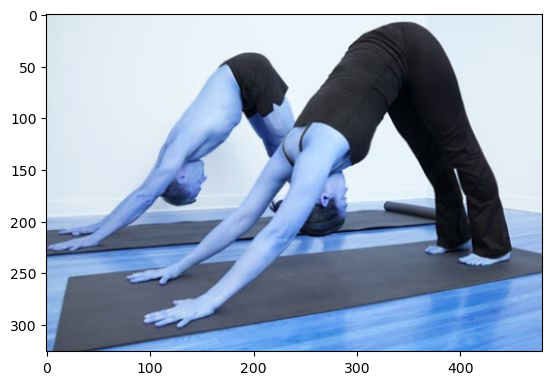

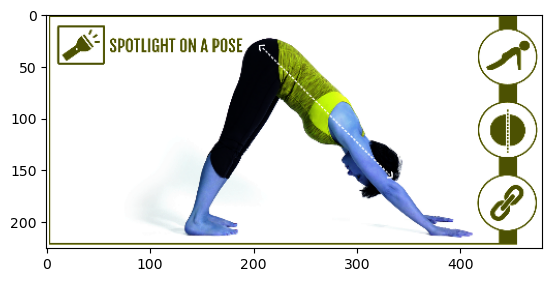

In [26]:
print_some_images(newarray)

In [27]:
def sharpenimage(image):
  laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
  if laplacian_var < 100:
    kernel = np.array([[0, -1, 0],
                      [-1, 5,-1],
                      [0, -1, 0]])

    sharpened_img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
  else:
    sharpened_img = image
  return sharpened_img

def improve_sharpening(overall_images):
    new_arr = []
    for i in range(len(overall_images)):
      col = overall_images[i]
      new_array_1 = []
      for j in range(len(overall_images[i])):
        img = sharpenimage(overall_images[i][j])
        #appending the image to a new array
        new_array_1.append(img)
      new_arr.append(new_array_1)

    return new_arr
# now new array will contain the sharpened  images
newarray=improve_sharpening(newarray)

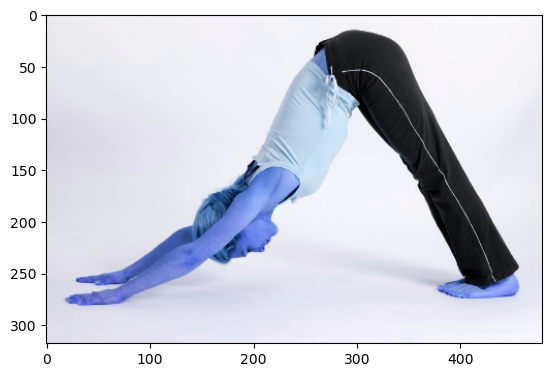

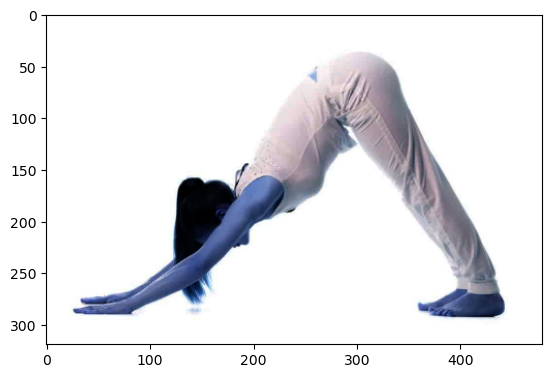

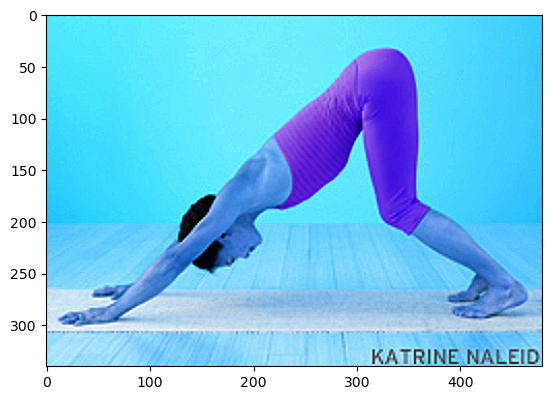

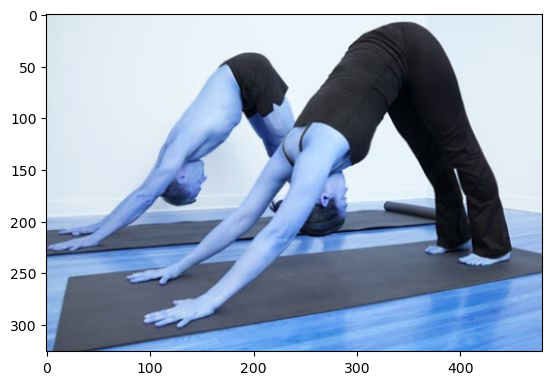

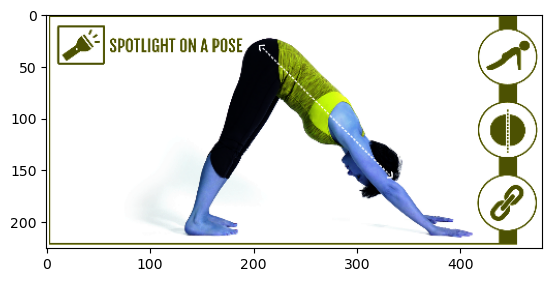

In [28]:
print_some_images(newarray)

Calculate key angles of yoga pose estimation

In [30]:
import mediapipe as mp
import cv2
import math
import numpy as np
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [34]:
image = cv2.imread('F:/Anaconda_Project/yoga_assistant-master_Version02/DATASET/TRAIN/downdog/00000128.jpg',1)

In [40]:
# Run MediaPipe Pose with `enable_segmentation=True` to get pose segmentation.


def md_enable_segmentation(image):
  with mp_pose.Pose( static_image_mode=True, min_detection_confidence=0.50,model_complexity=2, enable_segmentation=True) as pose:

    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.segmentation_mask is not None:
            # Draw pose segmentation.
            annotated_image = image.copy()
            red_img = np.zeros_like(annotated_image, dtype=np.uint8)
            red_img[:, :] = (255, 255, 255)
            segm_2class = 0.2 + 0.8 * results.segmentation_mask
            segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
            annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)
            img_some = annotated_image
            annotated_image = cv2.normalize(annotated_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    else:
        # Handle the case where segmentation_mask is None
        annotated_image = image.copy()

    # cv2_imshow(annotated_image)
  return annotated_image



def body_segmentation(overall_images):
    new_arr = []
    for i in range(len(overall_images)):
      col = overall_images[i]
      new_array_1 = []
      for j in range(len(overall_images[i])):
        img = md_enable_segmentation(overall_images[i][j])
        #appending the image to a new array
        new_array_1.append(img)
      new_arr.append(new_array_1)

    return new_arr
    
newarray = body_segmentation(newarray)

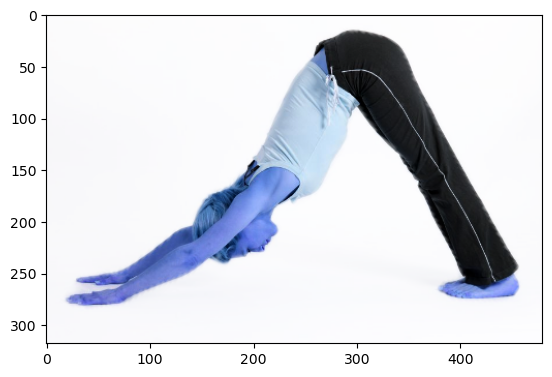

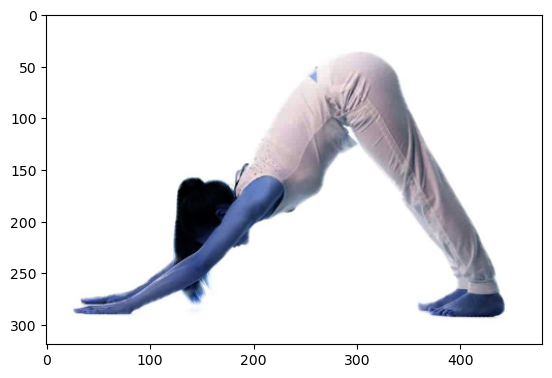

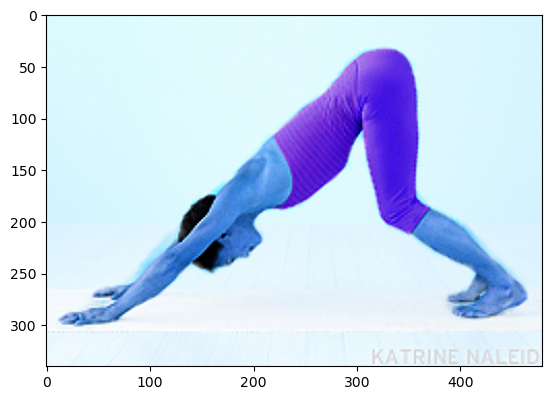

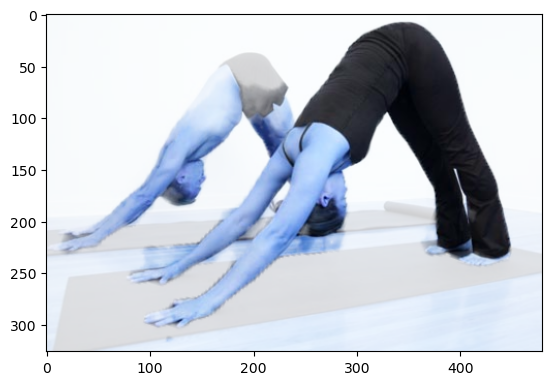

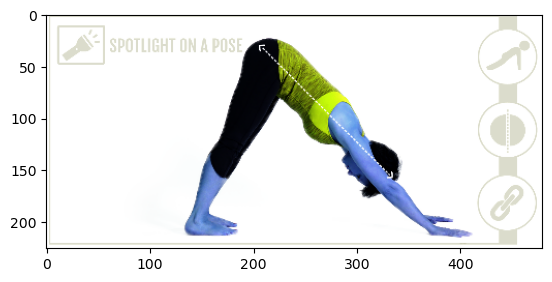

In [41]:
print_some_images(newarray)

In [44]:
def detectPose(image, pose, display=True):


    # Create a copy of the input image.
    output_image = image.copy()

    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform the Pose Detection.
    results = pose.process(imageRGB)

    # Retrieve the height and width of the input image.
    height, width, _ = image.shape

    # Initialize a list to store the detected landmarks.
    landmarks = []

    # Check if any landmarks are detected.
    if results.pose_landmarks:

        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)

        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:

            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))

    # Check if the original input image and the resultant image are specified to be displayed.
    if display:

        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # Otherwise
    else:

        # Return the output image and the found landmarks.
        return output_image, landmarks

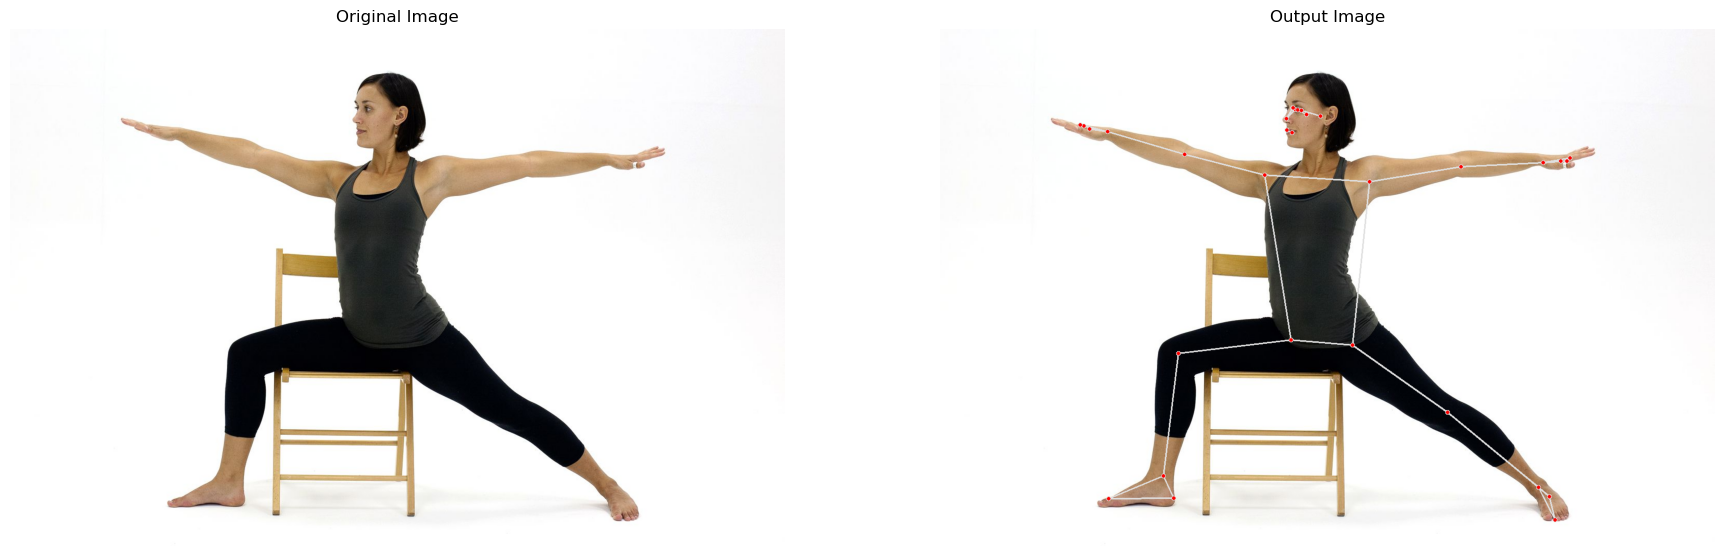

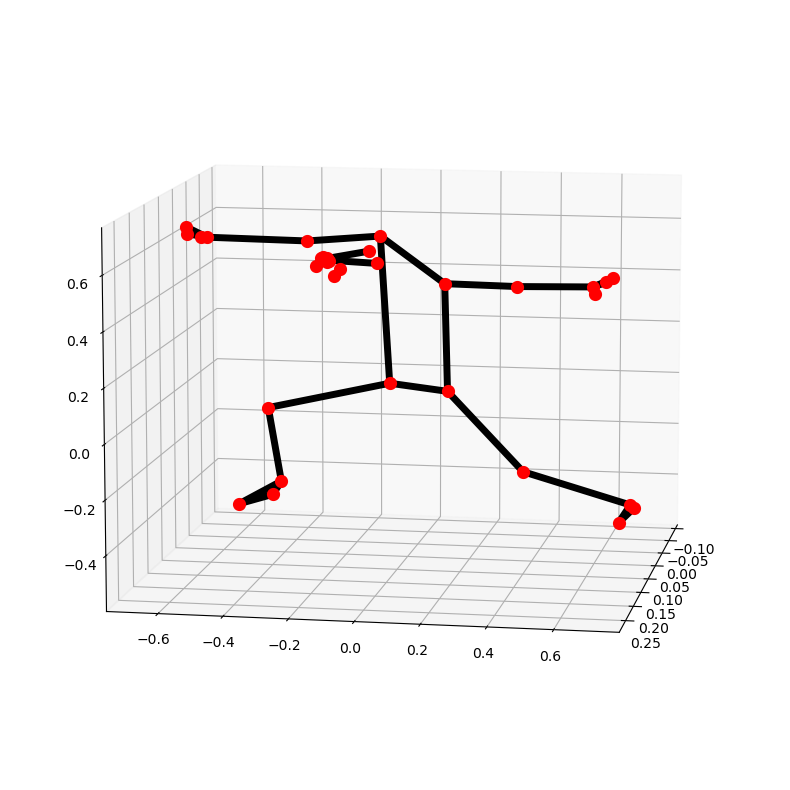

In [47]:
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
image = cv2.imread('F:/Anaconda_Project/yoga_assistant-master_Version02/DATASET/TRAIN/warrior2/00000122.jpg',1)
detectPose(image, pose, display=True)

In [46]:
def calculateAngle(landmark1, landmark2, landmark3):


    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))

    # Check if the angle is less than zero.
    if angle< 0:

        # Add 360 to the found angle.
        angle += 360

    return angle

In [48]:
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))
print(angle , "angle")

166.26373169437744 angle


In [49]:
def classifyPose_to_csv(landmarks, output_image, display=False):

    angles = []

    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)

    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------




    # Get the angle between the left elbow, wrist and left index points.
    left_wrist_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value])
    angles.append(left_wrist_angle)
    # Get the angle between the right elbow, wrist and left index points.
    right_wrist_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value])
    angles.append(right_wrist_angle)


    # Get the angle between the left shoulder, elbow and wrist points.
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    angles.append(left_elbow_angle)
    # Get the angle between the right shoulder, elbow and wrist points.
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])
    angles.append(right_elbow_angle)
    # Get the angle between the left elbow, shoulder and hip points.
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    angles.append(left_shoulder_angle)

    # Get the angle between the right hip, shoulder and elbow points.
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    angles.append(right_shoulder_angle)

    # Get the angle between the left hip, knee and ankle points.
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    angles.append(left_knee_angle)

    # Get the angle between the right hip, knee and ankle points
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    angles.append(right_knee_angle)

        # Get the angle between the left hip, ankle and LEFT_FOOT_INDEX points.
    left_ankle_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value])
    angles.append(left_ankle_angle)

    # Get the angle between the right hip, ankle and RIGHT_FOOT_INDEX points
    right_ankle_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value])
    angles.append(right_ankle_angle)

    # Get the angle between the left knee, hip and right hip points.
    left_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value])
    angles.append(left_hip_angle)

    # Get the angle between the left hip, right hip and right kneee points
    right_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value])
    angles.append(right_hip_angle)

    # print(left_elbow_angle, " left_elbow_angle ", right_elbow_angle , " right_elbow_angle ",left_shoulder_angle," left_shoulder_angle ",right_shoulder_angle," right_shoulder_angle ",left_knee_angle," left_knee_angle ", right_knee_angle," right_knee_angle " , left_ankle_angle, " left_ankle_angle ",right_ankle_angle," right_ankle_angle ")
    # print(angles)
    return angles

In [51]:
def Calc_angles(overall_images):
    angles_list = []
    new_arr = []
    for i in range(len(overall_images)):
      col = overall_images[i]
      new_array_1 = []
      for j in range(len(overall_images[i])):

        img = overall_images[i][j]
        output_image, landmarks = detectPose(img, pose, display=False)
        if landmarks:
            k = classifyPose_to_csv(landmarks, output_image, display=True)
            k.insert(0,i)
            angles_list.append(k)
        else:
          continue
        #appending the image to a new array

      # new_arr.append(new_array_1)
    return angles_list


angles_array = Calc_angles(newarray)

In [52]:
len(angles_array)

1045

In [58]:
import pandas as pd
df = pd.DataFrame(angles_array)
df.columns =['Pose',"left_wrist_angle" , "right_wrist_angle" , "left_elbow_angle" , "right_elbow_angle" , "left_shoulder_angle" , "right_shoulder_angle","left_knee_angle","right_knee_angle","left_ankle_angle","right_ankle_angle","left_hip_angle","right_hip_angle"]

In [59]:
df.to_csv('F:/Anaconda_Project\yoga_assistant-master_Version02/yoga_index.csv', index=False, header=True)

In [60]:
df2=df.replace({"Pose": dict})
print(df2)

          Pose  left_wrist_angle  right_wrist_angle  left_elbow_angle  \
0      downdog        209.124053         198.305613        190.681518   
1      downdog        210.963757         211.429566        197.710743   
2      downdog        213.332197         213.164652        181.746842   
3      downdog        210.972835         191.259688        189.751718   
4      downdog        158.601281         144.855757        170.407834   
...        ...               ...                ...               ...   
1040  warrior2        129.973890         193.730216        123.986167   
1041  warrior2        187.594643         177.709390        174.090041   
1042  warrior2        191.309932         176.143199        174.289407   
1043  warrior2        177.881082         181.647029        179.910110   
1044  warrior2        173.586696         177.604994        175.793649   

      right_elbow_angle  left_shoulder_angle  right_shoulder_angle  \
0            192.153146           167.552376         

In [61]:
df2.to_csv('F:/Anaconda_Project/yoga_assistant-master_Version02/yoga_nameindex.csv', index=False, header=True)